In [80]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
# %matplotlib inline
import datetime
import os
import seaborn as sns#数据可视化
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
import pickle #用于存储模型
from sklearn.metrics import *
from sklearn.model_selection import *

In [81]:
df = pd.read_csv("records-for-2016.csv")
print('the columns name of records-for-2016 dataset:\n',df.columns)
print(df.info())
df.Priority.describe()

the columns name of records-for-2016 dataset:
 Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110828 entries, 0 to 110827
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     110827 non-null  object 
 1   Create Time                110827 non-null  object 
 2   Location                   110828 non-null  object 
 3   Area Id                    110827 non-null  object 
 4   Beat                       110247 non-null  object 
 5   Priority                   110827 non-null  float64
 6   Incident Type Id           110827 non-null  object 
 7   Incident Type Description  110827 non-null  object 
 8   Event Number               110827 non-null  object 
 9   Closed Time       

count    110827.000000
mean          1.778438
std           0.415299
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: Priority, dtype: float64

array([[<AxesSubplot:title={'center':'Priority'}>]], dtype=object)

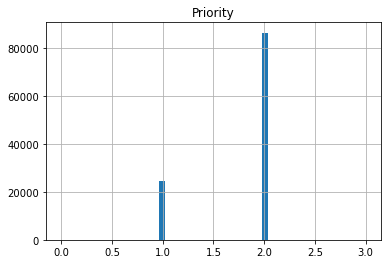

In [82]:
df.hist(column='Priority',range = (0,3),bins=50)

In [83]:
df.head()

Agency              Create Time             Location Area Id Beat  Priority  \
0     OP  2016-01-01T00:00:57.000     ST&MARKET ST          P1  05X       2.0   
1     OP  2016-01-01T00:01:25.000   AV&HAMILTON ST          P3  26Y       2.0   
2     OP  2016-01-01T00:01:43.000   ST&CHESTNUT ST          P1  02X       2.0   
3     OP  2016-01-01T00:01:48.000       WALLACE ST          P2  18Y       2.0   
4     OP  2016-01-01T00:02:05.000          90TH AV          P3  34X       2.0   

  Incident Type Id Incident Type Description     Event Number  \
0            415GS              415 GUNSHOTS  LOP160101000003   
1            415GS              415 GUNSHOTS  LOP160101000005   
2            415GS              415 GUNSHOTS  LOP160101000008   
3            415GS              415 GUNSHOTS  LOP160101000007   
4            415GS              415 GUNSHOTS  LOP160101000009   

               Closed Time  
0  2016-01-01T00:32:30.000  
1  2016-01-01T00:48:23.000  
2  2016-01-01T00:21:24.000  
3  2016-01-01T01:15:03.000  
4  2016-01-01T00:54:52.000

In [84]:
df['Location'].value_counts()

 INTERNATIONAL BLVD                            2156
 AV&INTERNATIONAL BLVD                         1829
 MACARTHUR BLVD                                1813
 BROADWAY                                      1472
 7TH ST                                        1223
                                               ... 
107TH ADELINE ST                                  1
BROCKHURST TOPANGA DR                             1
AVENAL EMBARCADERO                                1
45TH GASKILL ST                                   1
CLAREMONT GRAND AV&MARTIN LUTHER KING JR WY       1
Name: Location, Length: 24046, dtype: int64

In [85]:
df['Incident Type Id'].value_counts()

933R     10094
415       7883
SECCK     7251
10851     5308
911H      5089
         ...  
407          1
243A         1
3211H        1
ABC          1
955B         1
Name: Incident Type Id, Length: 242, dtype: int64

In [86]:
temp=df.loc[df['Incident Type Id']=="933R"]
temp.head()

Agency              Create Time         Location Area Id Beat  Priority  \
8      OP  2016-01-01T00:04:35.000   OUTLOOK AV          P3  30Y       2.0   
11     OP  2016-01-01T00:05:52.000      63RD ST          P1  10X       2.0   
16     OP  2016-01-01T00:10:27.000      LOWELL           P1  10X       2.0   
27     OP  2016-01-01T00:26:43.000      45TH AV          P3  27X       2.0   
39     OP  2016-01-01T00:34:38.000     CREST AV          P3  30Y       2.0   

   Incident Type Id Incident Type Description     Event Number  \
8              933R              ALARM-RINGER  LOP160101000014   
11             933R              ALARM-RINGER  LOP160101000016   
16             933R              ALARM-RINGER  LOP160101000025   
27             933R              ALARM-RINGER  LOP160101000054   
39             933R              ALARM-RINGER  LOP160101000074   

                Closed Time  
8   2016-01-01T00:11:13.000  
11  2016-01-01T01:41:34.000  
16  2016-01-01T02:38:10.000  
27  2016-01-01T01:03:30.000  
39  2016-01-01T09:07:26.000

In [87]:
temp["Incident Type Description"].value_counts()

ALARM-RINGER    10094
Name: Incident Type Description, dtype: int64

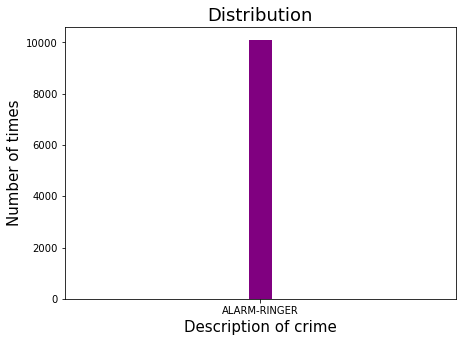

In [21]:
data2=list(temp["Incident Type Description"])
plt.figure(figsize=(7,5))
plt.hist(data2,bins=15,color="purple")
plt.xlabel("Description of crime",fontsize=15)
plt.ylabel("Number of times",fontsize=15)
plt.title("Distribution",fontsize=18)
plt.show()

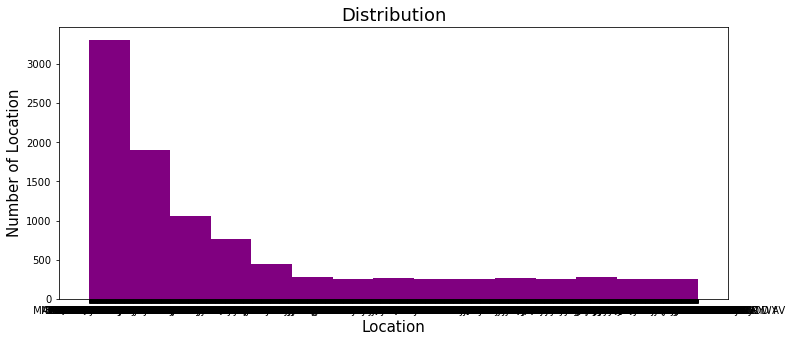

In [88]:
data3=list(temp["Location"])
plt.figure(figsize=(12,5))
plt.hist(data3,bins=15,color="purple")
plt.xlabel("Location",fontsize=15)
plt.ylabel("Number of Location",fontsize=15)
plt.title("Distribution",fontsize=18)
plt.show()

In [79]:
import time
time.strptime(df['Closed Time'][0],'%Y-%m-%dT%H:%M:%S.000')

ValueError: time data '01' does not match format '%Y-%m-%dT%H:%M:%S.000'